In [1]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
xl_workbook = xlrd.open_workbook('BPA_data/Input_data_UC.xlsx')

In [3]:
xl_workbook.sheet_names()

[u'Lines', u'Generators', u'Loads']

In [4]:
sheet_names = xl_workbook.sheet_names()

In [5]:
xl_sheet = xl_workbook.sheet_by_name(sheet_names[2])

In [6]:
ll=xl_sheet.col(xl_sheet.ncols-1)[1::]

In [7]:
aa=np.zeros([len(ll)])
for i in range(len(ll)):
    aa[i]=float(str(ll[i]).split(':')[1])
    

In [8]:
load_data=np.genfromtxt('BPA_data/day0.csv',delimiter=',',names=True)

In [9]:
load_data['wind'].flatten().shape

(24,)

In [10]:
len(range(23))

23

In [11]:
# output=np.column_stack((range(24),(aa[0:24]/np.max(aa[0:24])),load_data['wind'].flatten()))
# with open('BPA_data/day6.csv', 'wb') as f:
#     f.write(b'hour,load,wind\n')
#     np.savetxt(f,output,'%1.6f',delimiter=',')


In [12]:
len(aa)

8736

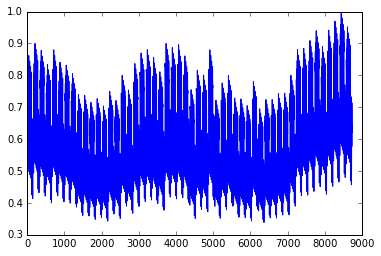

In [13]:
init=0
final=init+len(aa)
plt.plot(aa[init:final]/np.max(aa[init:final]))
plt.show()

In [27]:
xl_sheet = xl_workbook.sheet_by_name(sheet_names[1])
gen_info={}
names={}
technology=str(xl_sheet.col(2)[0]).split(':')[1]
for idx in range(3,xl_sheet.ncols):
    names[str(idx)]=str(xl_sheet.col(idx)[0]).split(':')[1]
    ll=xl_sheet.col(idx)[1::]
    gen_info[str(idx)]=np.zeros([len(ll)])
    for i in range(len(ll)):
        gen_info[str(idx)][i]=float(str(ll[i]).split(':')[1])
n_gen=xl_sheet.nrows-1

technology=[]
for i in range (1,len(ll)+1):
    technology.append ( str(xl_sheet.col(2)[i]).split(':')[1].split("'")[1])

total_capacity=np.sum(gen_info[str(3)])

In [28]:
# [(i,names[i]) for i in sorted(names,key = lambda x: int(x))]

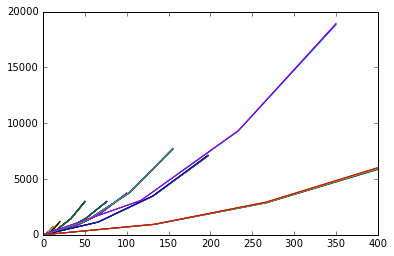

In [29]:
z={}
for gen_id in range(0,n_gen):
    step=gen_info['16'][gen_id]
    xx=np.linspace(0,step*3,4)
    y=np.zeros(4)
    for i in range (1,4):
#         print gen_info[str(i+12)][gen_id]
        y[i]=gen_info[str(i+12)][gen_id]*i*step + y[i-1]
    z[str(gen_id)]=np.polyfit(xx,y,2)
    plt.plot(xx,y)

In [30]:

techs=[]
for gen_id in range(0,n_gen):
    techs.append((technology[gen_id], #technology 0
                  z[str(gen_id)][0],  #Q2 1
                  z[str(gen_id)][1],  #Q1 2
                  int (gen_info['11'][gen_id]), #p_min 3
                  gen_info['3'][gen_id], #p_max 4
                  gen_info['7'][gen_id], #ramp_up 5
                  gen_info['8'][gen_id], #ramp_down 6
                  gen_info['9'][gen_id], #min down 7
                  gen_info['10'][gen_id], # min up 8
                  gen_info['26'][gen_id] # start up cost
                 ))
    

In [31]:
name_techno=list(set([techno[0] for techno in techs]))

In [32]:
473767./394754

1.2001575664844435

In [33]:
426720

426720

In [34]:
424791

424791

In [35]:
424583

424583

In [45]:
idx=4
print name_techno[idx] 
[(techno[5]/techno[4])*100/60 for techno in techs 
 if techno[0]==name_techno[idx]
]

OCGT


[7.5,
 7.5,
 7.5,
 7.5,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 7.5,
 7.5,
 7.5,
 7.5,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 7.5,
 7.5,
 7.5,
 7.5,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339,
 8.3333333333333339]

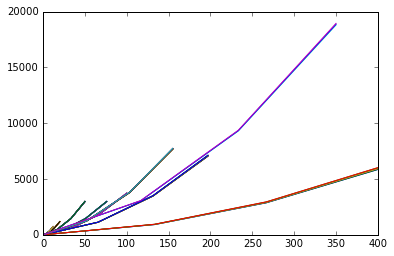

In [17]:
n_points=4
pwl_cost=np.zeros([n_gen,n_points-1])
for gen_id in range(0,n_gen):
    xx=np.linspace(gen_info['11'][gen_id]*0,gen_info['3'][gen_id],n_points)
    p=np.poly1d(z[str(gen_id)])
    y=np.zeros(n_points)
    for i in range (1,n_points):
        y[i]=p(xx[i])
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/((xx[i]-xx[i-1])))
#     print y[-1]
    plt.plot(xx,y)

In [18]:
for gen_id in range(n_gen):
    for i in range(1,n_points-1):
        assert pwl_cost[gen_id][i]>pwl_cost[gen_id][i-1]

Coal


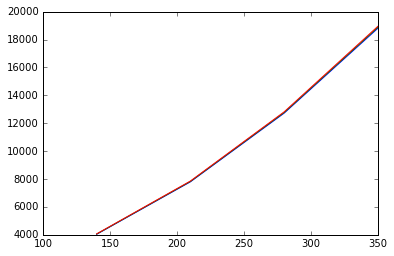

In [19]:
idg=3
print name_techno[idg]
for gen_id in range(0,n_gen):
    xx=np.linspace(gen_info['11'][gen_id],gen_info['3'][gen_id],n_points)
    p=np.poly1d(z[str(gen_id)])
    y=np.zeros(n_points)
    if technology[gen_id]==name_techno[idg]:
        for i in range (n_points):
            y[i]=p(xx[i])
        plt.plot(xx,y)

IGCC


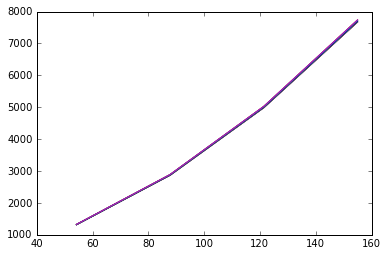

In [20]:
idg=1
print name_techno[idg]
for gen_id in range(0,n_gen):
    xx=np.linspace(gen_info['11'][gen_id],gen_info['3'][gen_id],n_points)
    p=np.poly1d(z[str(gen_id)])
    y=np.zeros(n_points)
    if technology[gen_id]==name_techno[idg]:
        for i in range (n_points):
            y[i]=p(xx[i])
        plt.plot(xx,y)

In [21]:
sorted_name_techno =[x[0] for x in sorted([[name,
         np.sum([techno[4] for techno in techs if techno[0]==name ])/total_capacity, 
         [techno[4] for techno in techs if techno[0]==name][0]
        ]
            for name in name_techno],
        key = lambda x: float(x[2]),reverse=True)]
     


In [22]:
print [x[1] for x in sorted([[name,
         np.sum([techno[4] for techno in techs if techno[0]==name ])/total_capacity, 
         [techno[4] for techno in techs if techno[0]==name][0]
        ]
            for name in name_techno],
        key = lambda x: float(x[2]),reverse=True)]

[0.23494860499265785, 0.10279001468428781, 0.18208516886930984, 0.43906020558002939, 0.041116005873715125]


In [24]:
max_tech={}
for name in name_techno:
    max_tech[name]={}
    max_tech[name]['max']=np.max([techno[3] for techno in techs if techno[0]==name ])
    max_tech[name]['id']=np.max([idx for idx,techno in enumerate(techs) if techno[0]==name and techno[3] == max_tech[name]['max'] ])


In [25]:
for name in sorted_name_techno:
    print techs[max_tech[name]['id']] 

('Nuclear', 0.029917833750000022, 3.0741044999999803, 100, 400.0, 280.0, 280.0, 24.0, 168.0, 40000.0)
('Coal', 0.11954207142857155, 12.270104999999957, 140, 350.0, 140.0, 140.0, 5.0, 8.0, 12064.0)
('IGCC', 0.25331129032258076, 10.655729999999988, 54, 155.0, 70.0, 80.0, 16.0, 24.0, 2058.0)
('CCGT', 0.14437728426395943, 7.7242649999999946, 104, 197.0, 310.0, 310.0, 3.0, 4.0, 230.0)
('OCGT', 2.2680749999999974, 13.795700000000027, 8, 20.0, 90.0, 100.0, 1.0, 2.0, 46.0)


In [26]:
[techno for idx,techno in enumerate(techs) if idx == max_tech['Coal']['id']]

[('Coal',
  0.11954207142857155,
  12.270104999999957,
  140,
  350.0,
  140.0,
  140.0,
  5.0,
  8.0,
  12064.0)]

In [31]:
# aggregation=4
# [(techno[1]/aggregation,techno[2]/aggregation,techno[4]*aggregation) for techno in techs ]

In [27]:
info=[11,3]
for name in name_techno:
    for i in info:
        print gen_info[str(i)][max_tech[name]['id']],
    print name

100.0 400.0 Nuclear
54.24 155.0 IGCC
104.0 197.0 CCGT
140.0 350.0 Coal
8.0 20.0 OCGT


In [28]:
sorted([(name,
         np.sum([techno[4] for techno in techs if techno[0]==name ])/total_capacity,
         np.max([techno[4] for techno in techs if techno[0]==name ]),
         np.min([techno[1] for techno in techs if techno[0]==name ])
        )
        for name in name_techno],
      key = lambda x: float(x[2]),reverse=True)
     


[('Nuclear', 0.23494860499265785, 400.0, 0.029130333750000015),
 ('Coal', 0.10279001468428781, 350.0, 0.11868492857142855),
 ('CCGT', 0.43906020558002939, 197.0, 0.14270215736040615),
 ('IGCC', 0.18208516886930984, 155.0, 0.25108548387096785),
 ('OCGT', 0.041116005873715125, 20.0, 2.2530749999999986)]